In [18]:
import torch
from torchsummary import summary
import torch.nn as nn
from torchvision import transforms
import cv2

In [58]:
state_dict = torch.load('trained_model2.pth')

In [59]:
class DeblurModel(nn.Module):
    def __init__(self):
        super(DeblurModel, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            # nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            # nn.ReLU(inplace=True),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(512, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            # nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            # nn.ReLU(inplace=True),
            nn.ConvTranspose2d(256, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(64, 3, kernel_size=3, stride=1, padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
model = DeblurModel()

In [60]:
model.load_state_dict(state_dict)

<All keys matched successfully>

In [61]:
new_img_path="mp2_test\custom_test\generated"

import os
img_directory = "mp2_test/custom_test/blur"

files = os.listdir(img_directory)

images_paths = [os.path.join(img_directory, file) for file in files]
# images_paths = [file+'/' for file in image_paths]

# images=[]
# for image_path in images_paths:
#     image_files=os.listdir(image_path)

#     images.extend([os.path.join( image_path,i) for i in image_files])

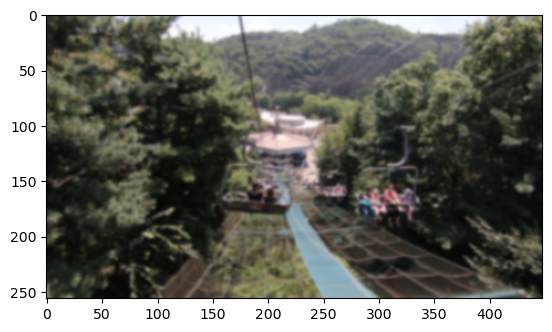

In [69]:
import matplotlib.pyplot as plt
import matplotlib.image as img

try_img=cv2.imread(images_paths[80])
try_img = cv2.cvtColor(try_img, cv2.COLOR_BGR2RGB)

plt.imshow(try_img)
plt.show()

In [78]:
from PIL import Image

# Load the image using OpenCV
test_img = cv2.imread(images_paths[80])

# Convert the image from BGR to RGB format
# test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

# Convert the NumPy array to PIL image
test_img_pil = Image.fromarray(test_img)

# Preprocess the image
preprocess = transforms.Compose([
    transforms.Resize((256, 448)),  # Resize the image
    transforms.ToTensor(),          # Convert to tensor
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])
input_tensor = preprocess(test_img_pil).unsqueeze(0)  # Add batch dimension

model.eval()

# Pass the input tensor through the model
with torch.no_grad():
    output_tensor = model(input_tensor)
print(output_tensor.shape)


torch.Size([1, 3, 256, 448])


In [79]:
output_array.shape

(256, 448, 3)

In [80]:
import numpy as np

# Assuming 'output_tensor' is your tensor obtained from the model
output_array = output_tensor.detach().cpu().numpy()  # Convert tensor to NumPy array
output_array = output_array.squeeze()
output_array = np.transpose(output_array, (1, 2, 0))  # Transpose to (height, width, channels)

# Rescale pixel values to valid range for image display (0 to 255)
output_array = ((output_array - output_array.min()) / (output_array.max() - output_array.min())) * 255

# Convert array to unsigned 8-bit integer (uint8) data type
output_array = output_array.astype(np.uint8)

# Display the image using OpenCV
cv2.imshow('Output Image', output_array)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [88]:
# converting all blur image of test set into sharp image for comparison

for blur_img in images_paths:
    # print(blur_img)
    parts = blur_img.split("\\")
    # print(parts)
    output_path_3 = os.path.join(new_img_path, f"{parts[-1]}")
    print(output_path_3)
    test_img = cv2.imread(blur_img)

    test_img_pil = Image.fromarray(test_img)
    
    preprocess = transforms.Compose([
        transforms.Resize((256, 448)),  
        transforms.ToTensor(),
    ])
    input_tensor = preprocess(test_img_pil).unsqueeze(0) 
    
    model.eval()
    
    with torch.no_grad():
        output_tensor = model(input_tensor)
    output_array = output_tensor.detach().cpu().numpy()  
    output_array = output_array.squeeze()
    output_array = np.transpose(output_array, (1, 2, 0)) 
    
    # Rescale pixel values to valid range for image display (0 to 255)
    output_array = ((output_array - output_array.min()) / (output_array.max() - output_array.min())) * 255
    
    # Convert array to unsigned 8-bit integer (uint8) data type
    output_array = output_array.astype(np.uint8)

    
    cv2.imwrite(output_path_3, output_array)
    

mp2_test\custom_test\generated\00000000029.png
mp2_test\custom_test\generated\00000000032.png
mp2_test\custom_test\generated\00000000043.png
mp2_test\custom_test\generated\00000000071.png
mp2_test\custom_test\generated\00000000099.png
mp2_test\custom_test\generated\00100000029.png
mp2_test\custom_test\generated\00100000032.png
mp2_test\custom_test\generated\00100000043.png
mp2_test\custom_test\generated\00100000071.png
mp2_test\custom_test\generated\00100000099.png
mp2_test\custom_test\generated\00200000029.png
mp2_test\custom_test\generated\00200000032.png
mp2_test\custom_test\generated\00200000043.png
mp2_test\custom_test\generated\00200000071.png
mp2_test\custom_test\generated\00200000099.png
mp2_test\custom_test\generated\00300000029.png
mp2_test\custom_test\generated\00300000032.png
mp2_test\custom_test\generated\00300000043.png
mp2_test\custom_test\generated\00300000071.png
mp2_test\custom_test\generated\00300000099.png
mp2_test\custom_test\generated\00400000029.png
mp2_test\cust

## Practising with channels cv2 vs PIL

In [34]:
image_cv = cv2.imread('your_image.jpg')
image__cv = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)

# Split the image into its color channels
r, g, b = cv2.split(image_rgb)

# Display each color channel
cv2.imshow('red Channel', r)
cv2.imshow('Green Channel', g)
cv2.imshow('blue Channel', b)
cv2.waitKey(0)
cv2.destroyAllWindows()

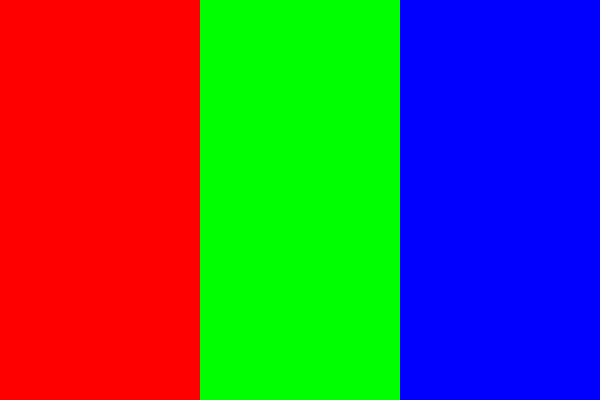

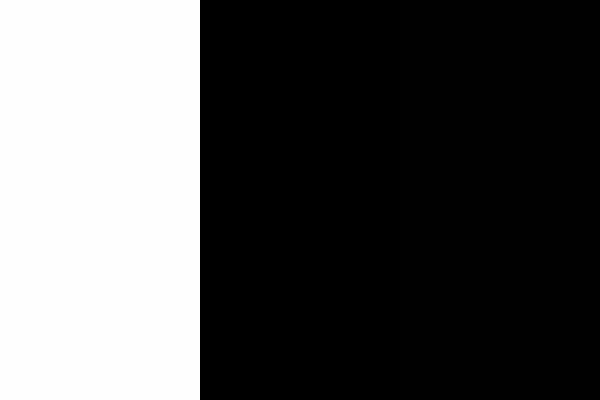

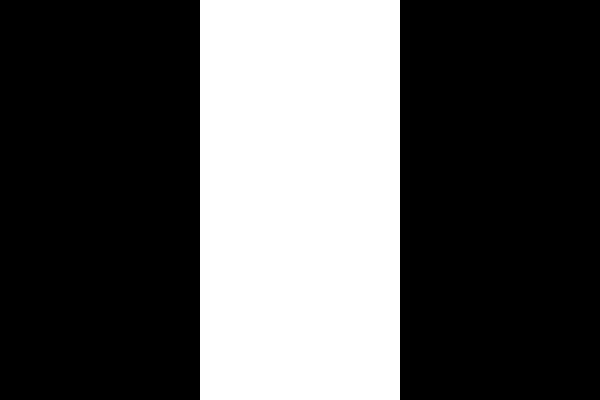

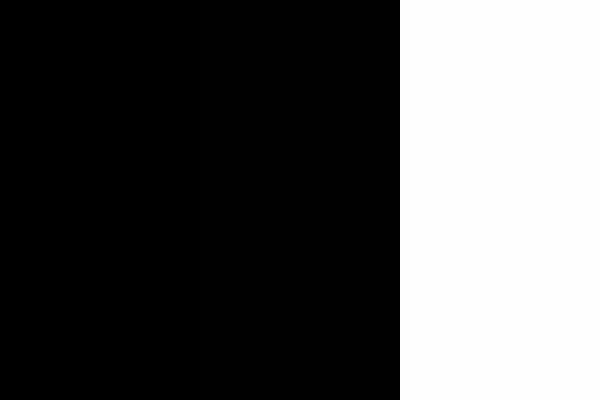

In [30]:
from PIL import Image
from IPython.display import display

# Open the image
image = Image.open('your_image.jpg')

# Split the image into its RGB channels
red, green, blue = image.split()

# Display each channel image
display(image)
display(red)
display(green)
display(blue)

In [35]:
img_path='your_image.jpg'

image = cv2.imread(img_path)
# b, g, r = cv2.split(image)
cv2.imshow('Image1',image)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

cv2.imshow('Image2',rgb_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [40]:
import torch.nn.functional as F

image1_tensor = torch.tensor(image, dtype=torch.float32)
image2_tensor = torch.tensor(image, dtype=torch.float32)

# Calculate the MSE loss
mse_loss = F.mse_loss(image1_tensor, image2_tensor)

In [41]:
mse_loss

tensor(0.)

Exception: File `'eval.py'` not found.